<a href="https://colab.research.google.com/github/FreMeli/ASE_1/blob/main/Agrup_EDOS_1A%C3%91O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
%matplotlib inline     
sns.set(color_codes=True)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters.model import ExponentialSmoothing
import statsmodels.api as sm

In [ ]:
from google.colab import files #Sirve para cargar archivos desde el disco duro a google colab
uploaded = files.upload()

Saving INEGI_exporta_12_4_2023_8_47_22.xls to INEGI_exporta_12_4_2023_8_47_22 (1).xls


In [ ]:
df=pd.read_excel(io.BytesIO(uploaded["INEGI_exporta_12_4_2023_8_47_22.xls"]), header=0)#df con los datos de la población
# Creamos una máscara booleana para seleccionar las filas que queremos eliminar
mask1 = (df['EDO'] == 'Total') |(df['EDO'] =='No especificado') |(df['AÑO'] !=2010)

# Aplicamos el método drop() para eliminar las filas seleccionadas por la máscara
df = df.drop(df[mask1].index)
df=df.drop(columns=['Hombre', 'Total'])
df

,AÑO,EDO,Mujer
331,2010,Aguascalientes,10
332,2010,Baja California,117
333,2010,Baja California Sur,10
334,2010,Campeche,9
335,2010,Coahuila de Zaragoza,61
336,2010,Colima,5
337,2010,Chiapas,22
338,2010,Chihuahua,584
339,2010,Ciudad de México,145
340,2010,Durango,93


In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Creamos un diccionario con los estados y sus respectivos valores numéricos
dict_edo = {'Aguascalientes': 1, 'Baja California': 2, 'Baja California Sur': 3,
            'Campeche': 4, 'Coahuila de Zaragoza': 5, 'Colima': 6, 'Chiapas': 7, 'Chihuahua': 8,
            'Ciudad de México': 9, 'Durango': 10, 'Guanajuato': 11, 'Guerrero': 12, 'Hidalgo': 13,
            'Jalisco': 14, 'México': 15, 'Michoacán de Ocampo': 16, 'Morelos': 17, 'Nayarit': 18,
            'Nuevo León': 19, 'Oaxaca': 20, 'Puebla': 21, 'Querétaro': 22, 'Quintana Roo': 23,
            'San Luis Potosí': 24, 'Sinaloa': 25, 'Sonora': 26, 'Tabasco': 27, 'Tamaulipas': 28,
            'Tlaxcala': 29, 'Veracruz de Ignacio de la Llave': 30, 'Yucatán': 31, 'Zacatecas': 32,}

# Aplicamos el método replace() para cambiar los estados por valores numéricos
df['EDO'] = df['EDO'].replace(dict_edo)
df

,AÑO,EDO,Mujer
331,2010,1,10
332,2010,2,117
333,2010,3,10
334,2010,4,9
335,2010,5,61
336,2010,6,5
337,2010,7,22
338,2010,8,584
339,2010,9,145
340,2010,10,93


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
scaled_features

array([[ 0.        , -1.67874412, -0.85393425],
       [ 0.        , -1.57043805,  1.68925283],
       [ 0.        , -1.46213197, -0.86920865],
       [ 0.        , -1.3538259 , -0.83865985],
       [ 0.        , -1.24551983, -0.76992507],
       [ 0.        , -1.13721376, -0.47971153],
       [ 0.        , -1.02890769, -0.43388834],
       [ 0.        , -0.92060161,  1.61288085],
       [ 0.        , -0.81229554,  0.02434357],
       [ 0.        , -0.70398947, -0.86157145],
       [ 0.        , -0.5956834 ,  3.19378092],
       [ 0.        , -0.48737732,  0.20763633],
       [ 0.        , -0.37907125, -0.6095439 ],
       [ 0.        , -0.27076518,  1.00954217],
       [ 0.        , -0.16245911,  2.39187509],
       [ 0.        , -0.05415304,  1.16992334],
       [ 0.        ,  0.05415304, -0.16658639],
       [ 0.        ,  0.16245911, -0.70119028],
       [ 0.        ,  0.27076518, -0.15131199],
       [ 0.        ,  0.37907125, -0.25823277],
       [ 0.        ,  0.48737732, -0.105

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [ ]:
model=kmeans.fit(scaled_features)

In [ ]:
kmeans.inertia_

13.902797821574108

In [ ]:
kmeans.cluster_centers_

array([[ 0.        ,  0.86644858, -0.3489245 ],
       [ 0.        , -0.5956834 ,  1.84454253],
       [ 0.        , -1.02890769, -0.54844631]])

In [ ]:
kmeans.n_iter_

7

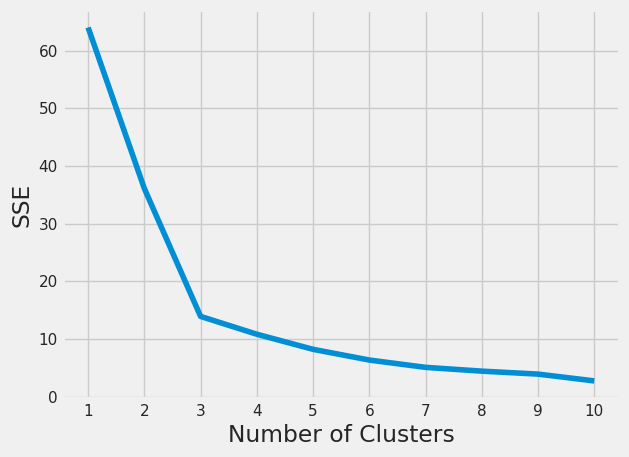

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [ ]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)
df['label'] = kmeans.labels_
#labels = kmeans.labels_

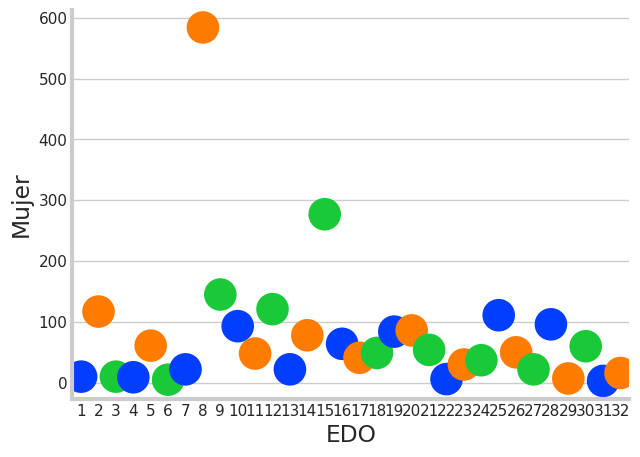

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

# Creamos el "point plot"
sns.set_style("whitegrid")
sns.pointplot(x="EDO", y="Mujer", data=df, palette=sns.color_palette("bright", len(df["label"].unique())))

# Mostramos la visualización
sns.despine()

In [ ]:
df

,AÑO,EDO,Mujer,label
331,2010,1,10,1
332,2010,2,117,1
333,2010,3,10,1
334,2010,4,9,1
335,2010,5,61,1
336,2010,6,5,1
337,2010,7,22,1
338,2010,8,584,2
339,2010,9,145,1
340,2010,10,93,1


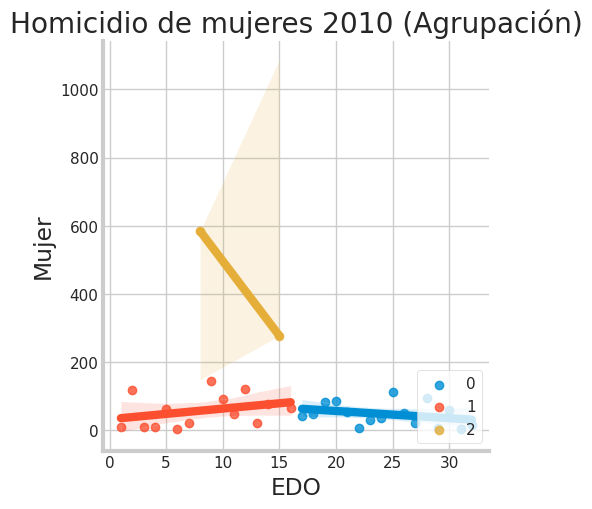

In [ ]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="EDO", y="Mujer", data=df, fit_reg=True, hue='label', legend=False)

# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('Homicidio de mujeres 2010 (Agrupación)')

plt.show()